# Gather the Data

In [1]:
import pandas as pd
import requests
import json
import tweepy 

Read all the image data.

In [ ]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
image = requests.get(url)
with open("image.tsv", 'wb') as f:
        f.write(image.content)
image = pd.read_csv("image.tsv",sep="\t")
image.to_csv('image.csv')

Read the twitter archieve data

In [ ]:
twitter = pd.read_csv("twitter-archive-enhanced.csv")

Gather the "like" and "retweet" number

In [ ]:
consumer_key = #
consumer_secret = #
access_token = #
access_secret = #

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
error=[]
with open('tweet_json.txt', 'a') as outfile:
    for tweet_id in list(image.tweet_id):
        try:
            temp = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(temp._json, outfile,indent=2)
            outfile.write('\n')
        except:
            error.append(tweet_id)

In [ ]:
import json
status = []
file = open('tweet_json.txt').read()[1:-2].split('}\n{')
for jsonline in file:
    data = json.loads("{"+jsonline+"}") 
    if data.get("retweeted") == False:
        tweet_id = data.get('id')
        retweets = data.get('retweet_count')
        likes = data.get('favorite_count')
        status.append({'tweet_id': tweet_id, 
                'retweets': retweets,
                'likes': likes})

In [ ]:
status = pd.DataFrame(status, columns = ["tweet_id","retweets","likes"])
status.to_csv("status.csv")

Merge all data that has an image

In [ ]:
final_data = image.merge(twitter, on = "tweet_id").merge(status, on = "tweet_id")
final_data.to_csv("final_data.csv")

# Access and Clean the data

In [2]:
import pandas as pd
twitter = pd.read_csv('final_data.csv',index_col=0)

In [26]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2076
Data columns (total 30 columns):
tweet_id                      2077 non-null object
jpg_url                       2077 non-null object
img_num                       2077 non-null int64
p1                            2077 non-null object
p1_conf                       2077 non-null float64
p1_dog                        2077 non-null bool
p2                            2077 non-null object
p2_conf                       2077 non-null float64
p2_dog                        2077 non-null bool
p3                            2077 non-null object
p3_conf                       2077 non-null float64
p3_dog                        2077 non-null bool
in_reply_to_status_id         2077 non-null object
in_reply_to_user_id           2077 non-null object
timestamp                     2077 non-null object
source                        2077 non-null object
text                          2077 non-null object
retweeted_status_id           

In [27]:
twitter.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweets,likes
58,667090893657276420,https://pbs.twimg.com/media/CUH7oLuUsAELWib.jpg,1,Chihuahua,0.959514,True,Italian_greyhound,0.005370,True,Pomeranian,...,https://twitter.com/dog_rates/status/667090893...,7,10,Clybe,None,None,None,None,130,341
439,674436901579923456,https://pbs.twimg.com/media/CVwUyM9WwAAGDjv.jpg,1,acorn_squash,0.375392,False,Shih-Tzu,0.105416,True,Lhasa,...,https://twitter.com/dog_rates/status/674436901...,9,10,Bailey,None,None,None,None,422,1175
924,702321140488925184,https://pbs.twimg.com/media/Cb8lWafWEAA2q93.jpg,3,West_Highland_white_terrier,0.769159,True,Scotch_terrier,0.064369,True,Old_English_sheepdog,...,https://twitter.com/dog_rates/status/702321140...,12,10,None,None,None,None,None,1138,3544
1197,740676976021798912,https://pbs.twimg.com/media/Ckdpx5KWsAANF6b.jpg,1,wombat,0.462952,False,Norwegian_elkhound,0.275225,True,Siamese_cat,...,https://twitter.com/dog_rates/status/740676976...,11,10,Baloo,None,None,pupper,None,7530,19559
1174,737322739594330112,https://pbs.twimg.com/media/Cjt_Hm6WsAAjkPG.jpg,1,guinea_pig,0.148526,False,solar_dish,0.097183,False,park_bench,...,https://twitter.com/dog_rates/status/737322739...,9,10,Lily,None,None,None,None,886,3881
1512,786595970293370880,https://pbs.twimg.com/media/CuqM0fVWAAAboKR.jpg,1,Pembroke,0.709512,True,Cardigan,0.287178,True,chow,...,https://twitter.com/dog_rates/status/786595970...,11,10,Dale,None,None,None,None,3524,10353
1319,756275833623502848,https://pbs.twimg.com/media/Cn7U2xlW8AI9Pqp.jpg,1,Airedale,0.602957,True,Irish_terrier,0.086981,True,bloodhound,...,https://twitter.com/dog_rates/status/756275833...,10,10,None,None,None,None,puppo,1710,7007
1715,819015331746349057,https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg,4,prison,0.907083,False,palace,0.020089,False,umbrella,...,https://twitter.com/dog_rates/status/819006400...,14,10,Sunny,doggo,None,None,None,21336,0
594,679503373272485890,https://pbs.twimg.com/media/CW4UtmYWsAAEjqA.jpg,1,porcupine,0.999846,False,meerkat,0.000072,False,echidna,...,https://twitter.com/dog_rates/status/679503373...,8,10,Dwight,None,None,pupper,None,1640,3414
276,670840546554966016,https://pbs.twimg.com/media/CU9N6upXAAAbtQe.jpg,1,Shih-Tzu,0.963622,True,Lhasa,0.016017,True,guinea_pig,...,https://twitter.com/dog_rates/status/670840546...,10,10,Colby,None,None,None,None,210,619


In [28]:
twitter.describe()

,img_num,p1_conf,p2_conf,p3_conf,retweets,likes
count,2077.000000,2077.000000,2.077000e+03,2.077000e+03,2077.000000,2077.000000
mean,1.203659,0.594462,1.347630e-01,6.034094e-02,2917.017814,8687.102070
std,0.561640,0.270897,1.008044e-01,5.090303e-02,4902.916648,12625.263774
min,1.000000,0.044333,1.011300e-08,1.740170e-10,13.000000,0.000000
25%,1.000000,0.364729,5.390140e-02,1.624560e-02,619.000000,1657.000000
50%,1.000000,0.587764,1.186220e-01,4.944380e-02,1382.000000,3838.000000
75%,1.000000,0.843799,1.955730e-01,9.193000e-02,3378.000000,10943.000000
max,4.000000,1.000000,4.880140e-01,2.734190e-01,77988.000000,144133.000000


After watched the data, we found many potential problems.
* Tweet id/status_id should be character not int/float
* P1,p2,p3 are not formatted.
* Retweeted_status_id has many null values.
* The stage of the dogs are in separate columns.
* Some names are wrong. (this/very/a/an)
* Retweeted pictures should be deleted.
* Some rating denominators are weird. (some taken the wrong number)
* The timestamp is not formatted.

### 1. Change ID Type

##### Define

Change all the ID's to string.

##### Code

In [68]:
names = []
for i in twitter.columns:
    if 'id' in i:
        names.append(i)
twitter[names]= twitter[names].astype(str)

##### Test

In [25]:
twitter.dtypes

tweet_id                       object
jpg_url                        object
img_num                         int64
p1                             object
p1_conf                       float64
p1_dog                           bool
p2                             object
p2_conf                       float64
p2_dog                           bool
p3                             object
p3_conf                       float64
p3_dog                           bool
in_reply_to_status_id          object
in_reply_to_user_id            object
timestamp                      object
source                         object
text                           object
retweeted_status_id            object
retweeted_status_user_id       object
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator               object
rating_denominator             object
name                           object
doggo                          object
floofer                        object
pupper      

### 2. Format the predictions

##### Define

The names of the prediction columns are all in lowercase and separated by "_".

##### Code

In [69]:
def fmat(s):
    return(' '.join(s.split('_')).title())
for i in ['p1','p2','p3']:
    twitter[i] = twitter[i].apply(fmat)

##### Test

In [30]:
print(twitter[['p1','p2','p3']].head(10))

                       p1                  p2                           p3
0  Welsh_springer_spaniel              collie            Shetland_sheepdog
1                 redbone  miniature_pinscher          Rhodesian_ridgeback
2         German_shepherd            malinois                   bloodhound
3     Rhodesian_ridgeback             redbone           miniature_pinscher
4      miniature_pinscher          Rottweiler                     Doberman
5    Bernese_mountain_dog    English_springer   Greater_Swiss_Mountain_dog
6              box_turtle          mud_turtle                     terrapin
7                    chow     Tibetan_mastiff                     fur_coat
8           shopping_cart     shopping_basket             golden_retriever
9        miniature_poodle            komondor  soft-coated_wheaten_terrier


### 3. Delete Re-tweets

##### Define

All the rows with a non-null retweets id needs to be deleted since we only want original tweets.

##### Code

In [70]:
unoriginal = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id']
for i in unoriginal:
    twitter = twitter.loc[twitter[i] == 'nan']
unoriginal.append('retweeted_status_timestamp')
twitter = twitter.drop(columns = unoriginal)

##### Test

In [31]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2076
Data columns (total 30 columns):
tweet_id                      2077 non-null object
jpg_url                       2077 non-null object
img_num                       2077 non-null int64
p1                            2077 non-null object
p1_conf                       2077 non-null float64
p1_dog                        2077 non-null bool
p2                            2077 non-null object
p2_conf                       2077 non-null float64
p2_dog                        2077 non-null bool
p3                            2077 non-null object
p3_conf                       2077 non-null float64
p3_dog                        2077 non-null bool
in_reply_to_status_id         2077 non-null object
in_reply_to_user_id           2077 non-null object
timestamp                     2077 non-null object
source                        2077 non-null object
text                          2077 non-null object
retweeted_status_id           

### 4. Format the Timestamp

##### Define

The timestamp column looks messy, we need to make it look tidy and sort the data by date.

##### Code

In [32]:
from datetime import datetime
def string_to_date(t):
    return(datetime.strptime(t, '%Y-%m-%d %H:%M:%S %z'))
def date_format(t):
    return(t.strftime('%d, %b %Y'))
def time_format(t):
    return(t.strftime('%H:%M:%S'))
twitter.timestamp = twitter.timestamp.apply(string_to_date)
twitter.sort_values(by = 'timestamp')
twitter['Date'] = twitter.timestamp.apply(date_format)
twitter['Time'] = twitter.timestamp.apply(time_format)

In [33]:
twitter = twitter.drop(columns = ['timestamp'])

##### Test

In [34]:
twitter[['Date','Time']].head(10)

,Date,Time
0,"15, Nov 2015",22:32:08
1,"15, Nov 2015",23:05:30
2,"15, Nov 2015",23:21:54
3,"16, Nov 2015",00:04:52
4,"16, Nov 2015",00:24:50
5,"16, Nov 2015",00:30:50
6,"16, Nov 2015",00:35:11
7,"16, Nov 2015",00:49:46
8,"16, Nov 2015",00:55:59
9,"16, Nov 2015",01:01:59


### 5. Correct Rating Denominator and Number

##### Define

There are some rows have the wrong value, and we need to correct them.

In [176]:
twitter['rating_denominator'].value_counts() 

10     1962
50     3   
80     2   
11     2   
170    1   
150    1   
120    1   
110    1   
90     1   
70     1   
40     1   
20     1   
7      1   
2      1   
Name: rating_denominator, dtype: int64

Now let us take a look at some of the text of the twitter that have unusual ratings.

In [177]:
pd.set_option('display.max_colwidth', -1)
display(twitter[['text','rating_denominator']][twitter['rating_denominator'] != 10])

,text,rating_denominator
20,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,2
501,Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,80
560,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,120
667,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,11
692,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,110
865,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,40
941,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,50
1007,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",50
1025,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80
1050,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,90


As we can see, some of them are wrong. (The line 1656 doesn't have a score)

##### Code

In [14]:
import re
for index, row in twitter.iterrows():
    l = re.findall(r'((?:\d+\.)?\d+)\/(\d+)',row['text'])[-1]
    twitter.loc[index,['rating_numerator','rating_denominator']] = l


##### Test

As we can see, except row 1656, other data all look normal and there are data with decimals.

In [35]:
twitter.rating_denominator.value_counts()

10     2064
80        2
50        2
90        1
110       1
120       1
170       1
70        1
40        1
150       1
7         1
130       1
Name: rating_denominator, dtype: int64

In [36]:
twitter.rating_numerator.value_counts()

12       475
10       422
11       415
13       287
9        150
8         98
7         53
14        40
6         33
5         32
3         19
4         16
2         10
1          5
0          2
24         1
1776       1
84         1
143        1
420        1
88         1
121        1
15         1
165        1
13.5       1
60         1
45         1
9.75       1
99         1
144        1
11.27      1
44         1
204        1
80         1
11.26      1
Name: rating_numerator, dtype: int64

### 6. Create a New Column
##### Define
We need to make a new column 'score' and drop the original 'rating_numerator','rating_denominator'.

##### Code

In [38]:
import numpy as np
def divide(x,y):
    return(float(float(x)/float(y))*10)
twitter['score'] = np.vectorize(divide)(twitter['rating_numerator'],twitter['rating_denominator'])

In [39]:
from statistics import median
twitter.loc[1656,'score'] = median(twitter['score'])

In [40]:
twitter = twitter.drop(['rating_numerator','rating_denominator'],axis = 1)

##### Test

In [41]:
twitter.score.value_counts()

12.00      479
10.00      423
11.00      422
13.00      287
9.00       151
8.00        98
7.00        53
14.00       40
6.00        33
5.00        32
3.00        19
4.00        16
2.00        10
1.00         5
0.00         2
15.00        1
13.50        1
11.26        1
11.27        1
420.00       1
9.75         1
1776.00      1
Name: score, dtype: int64

### 7. Separate Links From Text

##### Define

Every text is followed by a "https" link, and we need to remove them.

##### Code

In [46]:
twitter['link'] = 'None'
for index, row in twitter.iterrows():
    twitter.loc[index,'link'] = "https"+row['text'].split("https")[1]
    twitter.loc[index,'text'] = row['text'].split("https")[0]

##### Test

In [47]:
twitter.link.head(10)

0    https://t.co/BLDqew2Ijj
1    https://t.co/r7mOb2m0UI
2    https://t.co/y671yMhoiR
3    https://t.co/DWnyCjf2mx
4    https://t.co/4B7cOc1EDq
5    https://t.co/fvIbQfHjIe
6    https://t.co/v5A4vzSDdc
7    https://t.co/rdivxLiqEt
8    https://t.co/yWBqbrzy8O
9    https://t.co/pYAJkAe76p
Name: link, dtype: object

### 8. Find All the Right Names

##### Define

There are some dogs have name but get a "None" on their "name" column.

##### Code

In [50]:
def name_change(s):
    if s[0] == s[0].lower():
        s = 'None'
    return(s)
twitter.name = twitter.name.apply(name_change)

In [51]:
for index, row in twitter.iterrows():
    try:
        l = row['text'].split('named')
        name = l[1].split(".")[0]
        twitter.loc[index,'name'] = name
    except:
        pass

##### Test

In [185]:
for index, row in twitter.iterrows():
    if row['name'] == 'None' and 'name' in row['text']:
        print(row['text'])

These are Peruvian Feldspars. Their names are Cupit and Prencer. Both resemble Rand Paul. Sick outfits 10/10 &amp; 10/10 
This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesn't like being swallowed by a panda. 8/10 
Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af. 12/10 great pup 
I would do radical things in the name of Dog God. I'd believe every word in that book. 10/10 
This pup's name is Sabertooth (parents must be cool). Ears for days. Jumps unannounced. 9/10 would pet diligently 
We normally don't rate bears but this one seems nice. Her name is Thea. Appears rather fluffy. 10/10 good bear 
This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all 
Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 


##### Define

There are some dogs are named using "his/her name is".

##### Code

In [186]:
for index, row in twitter.iterrows():
    try:
        l = row['text'].split('name is')
        name = l[1].split(".")[0]
        twitter.loc[index,'name'] = name
    except:
        pass
    try:
        l1 = row['text'].split('names are')
        name1 = l1[1].split(".")[0].split('and')
        twitter.loc[index,'name'] = ','.join(name1)
    except:
        pass

##### Test

In [53]:
display(twitter.name.value_counts())

None              653
Charlie            11
Tucker             10
Penny              10
Lucy               10
Oliver             10
Cooper             10
Lola                8
Bo                  8
Winston             8
Sadie               8
Jax                 7
Toby                7
Daisy               7
Scout               6
Milo                6
Bailey              6
Dave                6
Koda                6
Bella               6
Stanley             6
Rusty               6
Leo                 5
Archie              5
Larry               5
Alfie               5
Oscar               5
Louis               5
Chester             5
Buddy               5
                 ... 
Barclay             1
Creg                1
Maisey              1
Billy               1
Gerbald             1
Lilli               1
Crimson             1
Ralphus             1
Eriq                1
Jamesy              1
Zuzu                1
Banditt             1
Raphael             1
Maxwell             1
Jazzy     

### 9. The Dogs' Stage

##### Define
There are four stages: doggo, puppo, pupper and floofer. We need to combine the columns.

##### Code

In [56]:
twitter['stage'] = 'None'
for index, row in twitter.iterrows():
    try: 
        l = row['text'].split()
        for i in ['doggo','puppo','pup','pups','pupper','floofer','doggos','puppos','puppers','floofers']:
            if i in l:
                twitter.loc[index,'stage'] = i
    except:
        pass    

##### Test

In [188]:
twitter.stage.value_counts()

None       1659
pupper     140 
pup        90  
doggo      44  
pups       15  
puppo      14  
puppers    11  
doggos     4   
floofer    2   
Name: stage, dtype: int64

##### Define

Now we need to merge all the different names of the same groups.

##### Code

In [57]:
def change_stage(s):
    if s in ['doggos','puppos','floofers','puppers','pups']:
        s = s[:-1]
    if s == 'pup':
        s = 'pupper'
    return(s)
twitter.stage = twitter.stage.apply(change_stage)

In [58]:
twitter = twitter.drop(['doggo','puppo','pupper','floofer'],axis =1)

##### Test

In [60]:
twitter.stage.value_counts()

None       1743
pupper      269
doggo        49
puppo        14
floofer       2
Name: stage, dtype: int64

### 10. Make All Texts in One Line

##### Define
Some texts are written in separate lines. (Separated by "\n")
##### Code

In [192]:
def one_line(s):
    return(' '.join(s.split('\n')))
twitter.text = twitter.text.apply(one_line)

##### Test

In [62]:
twitter.text.head(10)

0    Here we have a Japanese Irish Setter. Lost eye...
1    This is a western brown Mitsubishi terrier. Up...
2    Here is a very happy pup. Big fan of well-main...
3    This is a purebred Piers Morgan. Loves to Netf...
4    Here we have a 1949 1st generation vulpix. Enj...
5    This is a truly beautiful English Wilson Staff...
6    This is an odd dog. Hard on the outside but lo...
7    Here is a Siberian heavily armored polar bear ...
8    My oh my. This is a rare blond Canadian terrie...
9    Here is the Rand Paul of retrievers folks! He'...
Name: text, dtype: object

### 11. Extract the Source From the HTML Tags
##### Define
The source is between two tags, which need to be removed.

In [63]:
twitter.source.head(10)

0    <a href="http://twitter.com/download/iphone" r...
1    <a href="http://twitter.com/download/iphone" r...
2    <a href="http://twitter.com/download/iphone" r...
3    <a href="http://twitter.com/download/iphone" r...
4    <a href="http://twitter.com/download/iphone" r...
5    <a href="http://twitter.com/download/iphone" r...
6    <a href="http://twitter.com/download/iphone" r...
7    <a href="http://twitter.com/download/iphone" r...
8    <a href="http://twitter.com/download/iphone" r...
9    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

##### Code

In [64]:
def extract_from_tags(s):
    return(re.findall(r'>(.*?)<',s)[0])
twitter.source = twitter.source.apply(extract_from_tags)

##### Test

In [65]:
twitter.source.head(10)

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
5    Twitter for iPhone
6    Twitter for iPhone
7    Twitter for iPhone
8    Twitter for iPhone
9    Twitter for iPhone
Name: source, dtype: object

### 12. Change Column Names

##### Define

In [67]:
twitter.columns 

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'name', 'retweets', 'likes', 'Date', 'Time', 'score',
       'link', 'stage'],
      dtype='object')

##### Code

In [71]:
twitter.columns = ['Tweet_ID', 'Jpg_url', 'Img_number', 'Prediction_1', 'P1_confidence', 'P1_is_dog', 'Prediction_2',
       'P2_confidence', 'P2_is_dog', 'Prediction_3', 'P3_confidence', 'P3_is_dog', 'Source',
       'Text', 'Expanded_urls', 'Name', 'Retweets_number', 'Likes_number' , 'Date', 'Time', 'Score', 'Link',
       'Stage']

##### Test

In [72]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1979 entries, 0 to 2076
Data columns (total 23 columns):
Tweet_ID           1979 non-null object
Jpg_url            1979 non-null object
Img_number         1979 non-null int64
Prediction_1       1979 non-null object
P1_confidence      1979 non-null float64
P1_is_dog          1979 non-null bool
Prediction_2       1979 non-null object
P2_confidence      1979 non-null float64
P2_is_dog          1979 non-null bool
Prediction_3       1979 non-null object
P3_confidence      1979 non-null float64
P3_is_dog          1979 non-null bool
Source             1979 non-null object
Text               1979 non-null object
Expanded_urls      1979 non-null object
Name               1979 non-null object
Retweets_number    1979 non-null int64
Likes_number       1979 non-null int64
Date               1979 non-null object
Time               1979 non-null object
Score              1979 non-null float64
Link               1979 non-null object
Stage             

# Final File

In [196]:
twitter.to_csv('twitter_archive_master.csv')

# Visualization

In [202]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, push_notebook, show

In [214]:
output_notebook()
TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"
plot = figure(tools=TOOLS,
              title="The Trend of the Likes Number", 
            x_axis_label='Time', y_axis_label='Likes Number')
plot.scatter(x = twitter.index, y = twitter['Likes_number'],
          fill_color='green', fill_alpha=0.6,
          line_color=None)
handle = show(plot, notebook_handle=True)
plot.title.text = "New Title"
push_notebook(handle=handle)

Loading BokehJS ...

In [213]:
plot1 = figure(tools=TOOLS,
               title="The Trend of the Retweets Number", 
               x_axis_label='Time', y_axis_label='Retweets Number')
plot1.scatter(x = twitter.index, y = twitter['Retweets_number'],
          fill_color='green', fill_alpha=0.6,
          line_color=None)
handle = show(plot1, notebook_handle=True)
push_notebook(handle=handle)

In [242]:
plot1 = figure(tools=TOOLS,
               title="The Relations Between Likes and Score", 
               x_axis_label='Score', y_axis_label='Likes Number')
plot1.scatter(x = twitter.Score[twitter.Score <15] , y = twitter.Likes_number[twitter.Score <15],
          fill_color='green', fill_alpha=0.6,
          line_color=None)
handle = show(plot1, notebook_handle=True)
push_notebook(handle=handle)

In [243]:
with_name = twitter[twitter.Likes_number < 50000].Likes_number[twitter.Name != 'None']
without_name = twitter[twitter.Likes_number < 50000].Likes_number[twitter.Name == 'None']

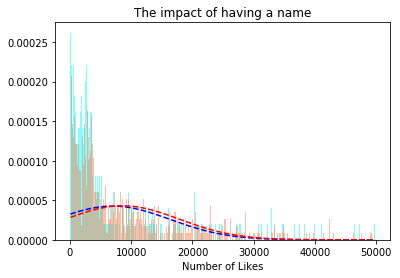

In [244]:
# import matplotlib
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
# set all the parameters
num_bins = len(without_name)
mu1=without_name.mean()
sigma1=without_name.std()
mu2=with_name.mean()
sigma2=with_name.std()
# the histogram of the number of dogs without name
n, bins, patches = plt.hist(without_name, num_bins, normed=1, facecolor='aqua', alpha=0.5)
# add a curve
y = mlab.normpdf(bins, mu1, sigma1)
plt.plot(bins, y, 'b--')
# the histogram of the number of dogs with name
n, bins, patches = plt.hist(with_name, num_bins, normed=1, facecolor='coral', alpha=0.5)
# add a curve
y = mlab.normpdf(bins, mu2, sigma2)
plt.plot(bins, y, 'r--')
plt.xlabel('Number of Likes')
plt.title("The impact of having a name")
plt.show()

# Insights

* The 'likes' number of the tweet is increasing dramatically over the time. From the visualization we can see that it is going up with the 'J' shape.

* The number of retweets is also growing, however, not as fast as the number of 'likes'. This is probably because more and more people start to click 'likes' without retweeting.

* Although we can see a little difference between the likes number of the named dogs and unnamed dogs, it is not significant at all. Thus probably giving your dog a name is not necessary to get more likes.

* The score and the number of likes have a possitive relation, which means the person who give the score has a similar tastes as his or her readers. However, it may also because the score has an impact on the readers.